<a href="https://colab.research.google.com/github/muzammil-max/ML-and-DL-Journey/blob/main/Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First Install Scklearn

In [4]:
!pip install -q scikit-learn

In [6]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [7]:
import numpy as np #Provides support for multi dimensional array like tensors and performing calculations (high level) that includes dot product , cross product , matrix operations
import pandas as pd #Used for Data manipulation and analysis.Used to load training dataset into model
import matplotlib.pyplot as plt # Visualization
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as tf
import tensorflow as tf

In [17]:
#loading data set (How many ppl survived in titanic incident)

dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
print(dftrain.head()) #it shows us the first 5 data frames in our data set
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

#now if we print the training dataset again we will see that survived columns is vanished this is because its pop in to y_train
# print(dftrain.head())
# print("-------------------------")
# print(y_train)

#we use .loc method to locate the row in dataset
print(dftrain.loc[0],y_train.loc[0])

# Now if we want to find age we do this
print(dftrain['age']) #it gives us all age in dataset we can put another columns values too and this is how we gonna locate things in dataset.

   survived     sex   age  n_siblings_spouses  parch     fare  class     deck  \
0         0    male  22.0                   1      0   7.2500  Third  unknown   
1         1  female  38.0                   1      0  71.2833  First        C   
2         1  female  26.0                   0      0   7.9250  Third  unknown   
3         1  female  35.0                   1      0  53.1000  First        C   
4         0    male  28.0                   0      0   8.4583  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
3  Southampton     n  
4   Queenstown     y  
sex                          male
age                          22.0
n_siblings_spouses              1
parch                           0
fare                         7.25
class                       Third
deck                      unknown
embark_town           Southampton
alone                           n
Name: 0, dtype: object 0
0      22.0
1      38.0
2      26.0
3      3

In [19]:
#Method 1 .head()
#gives us the first 5 entries in dataset in a formatted way.
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [21]:
#method 02 .describe()
#This methods tells us the statistical data about our dataset like standard deviation , upper quartile , lower quartile , min and max.

dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [23]:
#method 03 .shape()
#This tells us about the rows and columns (tensors) in our dataset
# (rows,columns)

dftrain.shape

(627, 9)

In [24]:
#Example of .head()

y_train.head()

,survived
0,0
1,1
2,1
3,1
4,0


<Axes: >

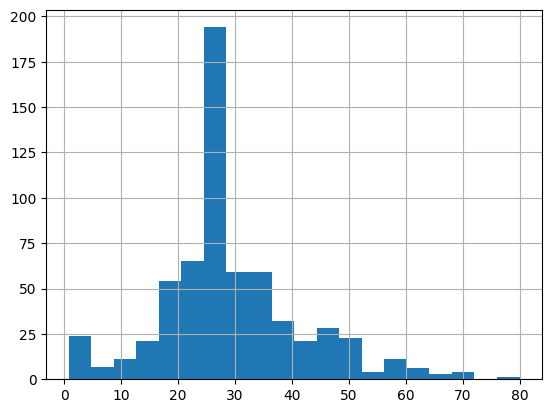

In [25]:
#plotting graphs using pandas to analyze information

dftrain.age.hist(bins=20) #it plots the histograms in 20 intervals  and will use age columns
